In [19]:
import numpy as np
from scipy import sparse
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, learning_curve

In [3]:
# change the directory to the root folder
os.chdir(os.path.dirname(os.getcwd()))

In [37]:
# load custom modules and keep them updated
%load_ext autoreload
%autoreload 2
from src.common.utils import save_model, load_model, save_cv_results, load_cv_results, plot_leanring_curve, save_plot, save_metrics
from src.dataset1_tabular.models import KNNModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# load data
X_train = sparse.load_npz('data/dataset1/processed/X_train.npz')
X_test = sparse.load_npz('data/dataset1/processed/X_test.npz')
y_train = np.load('data/dataset1/processed/y_train.npy')
y_test = np.load('data/dataset1/processed/y_test.npy')

print(f'The shape of X train: {X_train.shape}')
print(f'the shape of X test: {X_test.shape}')

The shape of X train: (32950, 67)
the shape of X test: (8238, 67)


# KNN

In [7]:
dataset = 'dataset1'
model_name = 'knn'

## Hyperparameter tuning

In [9]:
# KNN model
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNNModel(X_train, y_train,X_test, y_test,cv=5,param_grid=param_grid)

# trian the model
knn.train()

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
Best score:  0.905
Model saved successfully at results/knn_dataset1.joblib


AttributeError: module 'posixpath' has no attribute 'exist'

In [15]:
# save model
save_model(knn.best_model, 'results/model_outputs', model_name, dataset)
# save cv results
save_cv_results(knn.cv_results, 'results/model_outputs', model_name, dataset)

Model saved successfully at results/knn_dataset1.joblib
Cross-validation results saved successfully at results/knn_dataset1_cv_results.pkl


Accuracy: 0.903
Precision: 0.634
Recall: 0.383
f1-score: 0.477


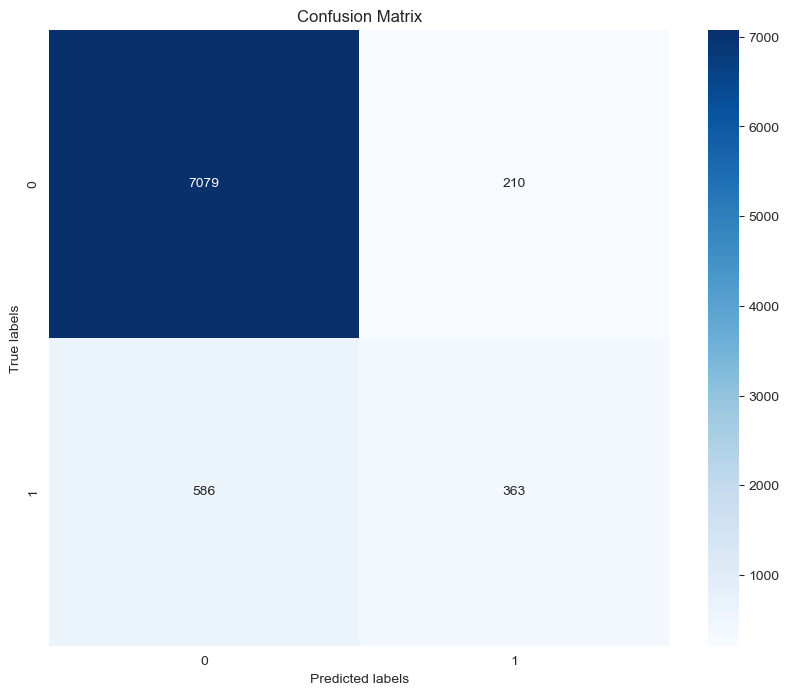

{'accuracy': 0.9033746054867686,
 'precision': 0.6335078534031413,
 'recall': 0.38250790305584825,
 'f1': 0.4770039421813403}

In [16]:
eval_results = knn.evaluate()
save_metrics(eval_results, 'results/model_outputs', model_name, dataset)

## Learning Curve

In [20]:
# load the best model
best_model = load_model('results/model_outputs', 'knn', 'dataset1')

Model loaded successfully from results/knn_dataset1.joblib


[learning_curve] Training set sizes: [  263  2636  5272 10544 15816 21088 26360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  35 | elapsed:  2.1min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  5.9min finished


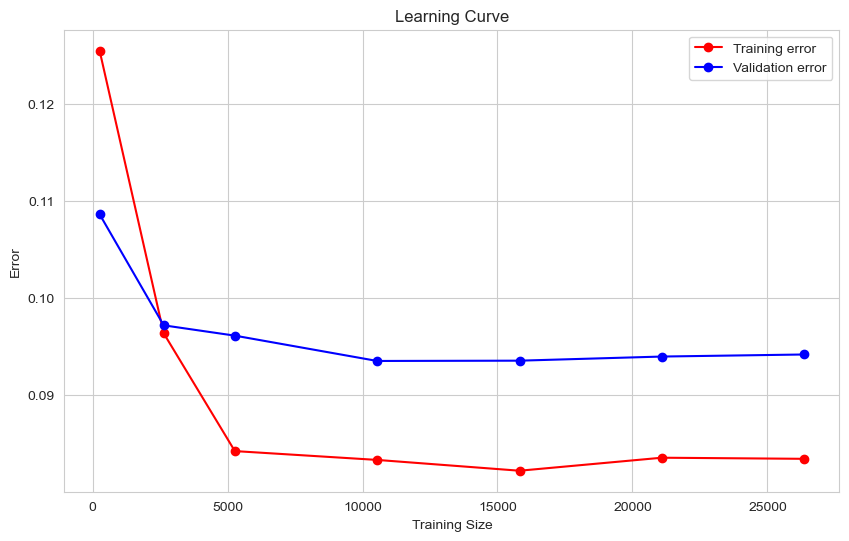

In [30]:
lc_plt = plot_leanring_curve(best_model, X_train, y_train, cv = 5, train_size=[0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1])
save_plot(lc_plt, 'results/figures', 'knn','learning_curve', 'dataset1')